# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
import spacy
from spacymoji import Emoji
from nltk.corpus import stopwords, words
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# f1_score
# matthews_corrcoef

# Import data

In [3]:
df_info = pd.read_csv('../data/shoppingapps_info.csv')
df_google = pd.read_csv('../data/google_apps_reviews.csv')
df_apple = pd.read_csv('../data/apple_apps_reviews.csv')

## Checking info 

In [4]:
df_info.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,Shopee: #1 Online Platform,*For usage in Singapore only\r\n\r\nShopee is ...,*For usage in Singapore only<br><br>Shopee is ...,#1 Online Shopping Platform\r\n15% Cashback | ...,#1 Online Shopping Platform<br>15% Cashback | ...,"1,000,000+",1000000,4.776189,75281,20125,...,NaN,NaN,False,"May 24, 2015",1600059737,2.60.11,Thanks for using Shopee! We’ve fixed some bugs...,Thanks for using Shopee! We’ve fixed some bugs...,com.shopee.sg,https://play.google.com/store/apps/details?id=...
1,"Carousell: Snap-Sell, Chat-Buy",Carousell is a community marketplace that lets...,Carousell is a community marketplace that lets...,"Carousell: Snap to Sell, Chat to Buy. And it's...","Carousell: Snap to Sell, Chat to Buy. And it&#...","10,000,000+",10000000,4.542936,186438,70213,...,Parental Guidance Recommended,True,True,"Jan 15, 2013",1600053888,2.179.753.778,"Every week, we polish the app to help you buy,...","Every week, we polish the app to help you buy,...",com.thecarousell.Carousell,https://play.google.com/store/apps/details?id=...
2,Lazada & RedMart - Online Shopping & Groceries,Welcome to the brand new Lazada™ mobile app! J...,Welcome to the brand new Lazada™ mobile app! J...,Shop Countless Deals Online at Lazada Singapore!,Shop Countless Deals Online at Lazada Singapore!,"100,000,000+",100000000,4.441479,7051435,2646815,...,NaN,NaN,False,"Jun 8, 2013",1600176475,6.52.0,Thanks for using LAZADA! We've enhanced the pe...,Thanks for using LAZADA! We&#39;ve enhanced th...,com.lazada.android,https://play.google.com/store/apps/details?id=...
3,"AliExpress - Smarter Shopping, Better Living","Ever wanted to shop everything in one place, a...","Ever wanted to shop everything in one place, a...","AliExpress - Smarter Shopping, Better Living","AliExpress - Smarter Shopping, Better Living","100,000,000+",100000000,4.509242,10217530,3144111,...,Parental Guidance Recommended,NaN,False,"Sep 27, 2012",1600157563,8.16.0,We're always looking for ways to further optim...,We&#39;re always looking for ways to further o...,com.alibaba.aliexpresshd,https://play.google.com/store/apps/details?id=...
4,eBay: Discover great deals on the brands you love,"Buy, sell and save with the eBay app! Shop dea...","Buy, sell and save with the eBay app! Shop dea...",Buy and sell on the world’s largest marketplac...,Buy and sell on the world’s largest marketplac...,"100,000,000+",100000000,4.716624,3436915,1263982,...,Parental Guidance Recommended,True,True,"Feb 17, 2010",1599781634,Varies with device,Tap “lockable filters” in the “customize” sect...,Tap “lockable filters” in the “customize” sect...,com.ebay.mobile,https://play.google.com/store/apps/details?id=...


In [5]:
df_info.title

0                           Shopee: #1 Online Platform
1                       Carousell: Snap-Sell, Chat-Buy
2       Lazada & RedMart - Online Shopping & Groceries
3         AliExpress - Smarter Shopping, Better Living
4    eBay: Discover great deals on the brands you love
5       Amazon Shopping - Search, Find, Ship, and Save
6                                                 ASOS
7                             Wish - Shopping Made Fun
Name: title, dtype: object

## Checking Google Playstore Review

In [6]:
df_google.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFMK_YUOfYqWluUehP3lajbdBztb0kaA_oinNC...,songsin12,https://lh3.googleusercontent.com/-_Z0Ydwm7Xcc...,Orders mostly came early and products are good.,5,0,2.60.11,2020-09-16 20:26:28,"""Thank you for giving Shopee a 5-star review! ...",2020-07-09 10:04:23,newest,com.shopee.sg
1,gp:AOqpTOECqGI7ocjdKrG5PykxhWmBG2wp1HzwO5zxrvj...,Ho Soh Fong,https://lh3.googleusercontent.com/a-/AOh14GhHM...,Good and convenient,4,0,2.60.08,2020-09-16 20:13:46,Thank you for your review. We're excited to be...,2020-09-16 20:17:31,newest,com.shopee.sg
2,gp:AOqpTOFK6om-GRJCgm-WXGyf_nurLs1YXL3FSoLRr5b...,Yasohthah Devadas,https://lh3.googleusercontent.com/-sji2OhurxhM...,Gd...........,5,0,2.60.11,2020-09-16 20:13:05,Thank you for giving Shopee a 5-star review! W...,2020-09-16 20:18:24,newest,com.shopee.sg
3,gp:AOqpTOHfstsd3G5jEoFQn62yZ9gpYcVj2oRlZZkKWBn...,May Han,https://play-lh.googleusercontent.com/-RhVs3Za...,My first purchase experience...Happy with purc...,4,0,2.60.11,2020-09-16 20:11:18,Thank you for your review. We're excited to be...,2020-09-16 20:28:10,newest,com.shopee.sg
4,gp:AOqpTOGtT_ODk0PZdHD0m_phZw4fFng1RvxZsM9Gk_v...,fauziah ata,https://lh3.googleusercontent.com/-NhTM2s673Pw...,A lot of items at a very good deal.,5,0,NaN,2020-09-16 20:08:54,Thank you for giving Shopee a 5-star review! W...,2020-09-16 20:29:35,newest,com.shopee.sg


In [7]:
labels = {'appId' : {'com.amazon.mShop.android.shopping' : 'amazon',
                    'com.ebay.mobile' : 'ebay',
                     'com.shopee.sg': 'shoppee',
                     'com.alibaba.aliexpresshd': 'aliexpress',
                     'com.thecarousell.Carousell': 'carousell',
                     'com.asos.app': 'asos',
                     'com.lazada.android': 'lazada',
                     'com.contextlogic.wish': 'wish',
                    }}
df_google.replace(labels, inplace=True)
df_google['appId'].value_counts()

lazada        10000
asos          10000
carousell     10000
ebay          10000
shoppee       10000
aliexpress    10000
wish          10000
amazon        10000
Name: appId, dtype: int64

## Checking Apple Appstore Review

In [8]:
df_apple.head()

,date,title,userName,rating,review,developerResponse,isEdited,appid
0,2020-08-05 05:32:41,Good in price and customers’ interest platform,Little tortoise,5,Shopee is a platform that protecting customers...,"{'id': 17097958, 'body': ""Thank you for giving...",False,shoppee
1,2019-12-17 15:59:30,Bad experience,Tujimu,1,I have been used this app for years. However t...,"{'id': 12456571, 'body': 'Hey,\n\nThank you fo...",False,shoppee
2,2020-08-03 09:08:40,Waste of time,Xed82,1,I regretted choosing shopee. Reason being: Pur...,"{'id': 17059815, 'body': 'Thank you for bringi...",False,shoppee
3,2019-12-09 08:02:35,Shoppee is not one of the best shopping app...!,Cartoonfreak1980,5,Who says shopee is one of the best shopping ap...,"{'id': 11615436, 'body': 'Hey, :D\n\nThank you...",True,shoppee
4,2020-04-10 04:39:06,Disappointed,Raymond Koh,1,"Initially when Shopee started, transactions ar...","{'id': 14589371, 'body': 'Thank you for bringi...",False,shoppee


## Adding new column to df

In [9]:
df_google['store'] = 'google'
df_apple['store'] = 'apple'

## Renaming columns

In [10]:
df_google.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId', 'store'],
      dtype='object')

In [11]:
df_google.rename(columns = {'score' : 'rating', 'at': 'date', 'appId': 'app', 'content': 'review'}, inplace = True)
df_google.head()

,reviewId,userName,userImage,review,rating,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,sortOrder,app,store
0,gp:AOqpTOFMK_YUOfYqWluUehP3lajbdBztb0kaA_oinNC...,songsin12,https://lh3.googleusercontent.com/-_Z0Ydwm7Xcc...,Orders mostly came early and products are good.,5,0,2.60.11,2020-09-16 20:26:28,"""Thank you for giving Shopee a 5-star review! ...",2020-07-09 10:04:23,newest,shoppee,google
1,gp:AOqpTOECqGI7ocjdKrG5PykxhWmBG2wp1HzwO5zxrvj...,Ho Soh Fong,https://lh3.googleusercontent.com/a-/AOh14GhHM...,Good and convenient,4,0,2.60.08,2020-09-16 20:13:46,Thank you for your review. We're excited to be...,2020-09-16 20:17:31,newest,shoppee,google
2,gp:AOqpTOFK6om-GRJCgm-WXGyf_nurLs1YXL3FSoLRr5b...,Yasohthah Devadas,https://lh3.googleusercontent.com/-sji2OhurxhM...,Gd...........,5,0,2.60.11,2020-09-16 20:13:05,Thank you for giving Shopee a 5-star review! W...,2020-09-16 20:18:24,newest,shoppee,google
3,gp:AOqpTOHfstsd3G5jEoFQn62yZ9gpYcVj2oRlZZkKWBn...,May Han,https://play-lh.googleusercontent.com/-RhVs3Za...,My first purchase experience...Happy with purc...,4,0,2.60.11,2020-09-16 20:11:18,Thank you for your review. We're excited to be...,2020-09-16 20:28:10,newest,shoppee,google
4,gp:AOqpTOGtT_ODk0PZdHD0m_phZw4fFng1RvxZsM9Gk_v...,fauziah ata,https://lh3.googleusercontent.com/-NhTM2s673Pw...,A lot of items at a very good deal.,5,0,NaN,2020-09-16 20:08:54,Thank you for giving Shopee a 5-star review! W...,2020-09-16 20:29:35,newest,shoppee,google


In [12]:
df_apple.columns

Index(['date', 'title', 'userName', 'rating', 'review', 'developerResponse',
       'isEdited', 'appid', 'store'],
      dtype='object')

In [13]:
df_apple.rename(columns = {'appid': 'app'}, inplace = True)
df_apple.head()

,date,title,userName,rating,review,developerResponse,isEdited,app,store
0,2020-08-05 05:32:41,Good in price and customers’ interest platform,Little tortoise,5,Shopee is a platform that protecting customers...,"{'id': 17097958, 'body': ""Thank you for giving...",False,shoppee,apple
1,2019-12-17 15:59:30,Bad experience,Tujimu,1,I have been used this app for years. However t...,"{'id': 12456571, 'body': 'Hey,\n\nThank you fo...",False,shoppee,apple
2,2020-08-03 09:08:40,Waste of time,Xed82,1,I regretted choosing shopee. Reason being: Pur...,"{'id': 17059815, 'body': 'Thank you for bringi...",False,shoppee,apple
3,2019-12-09 08:02:35,Shoppee is not one of the best shopping app...!,Cartoonfreak1980,5,Who says shopee is one of the best shopping ap...,"{'id': 11615436, 'body': 'Hey, :D\n\nThank you...",True,shoppee,apple
4,2020-04-10 04:39:06,Disappointed,Raymond Koh,1,"Initially when Shopee started, transactions ar...","{'id': 14589371, 'body': 'Thank you for bringi...",False,shoppee,apple


## Combining dataframe

In [14]:
df = df_google[['rating', 
                'date', 
                'app', 
                'store', 
                'review', ]].append(df_apple[['rating', 
                                               'date', 
                                               'app', 
                                               'store', 
                                               'review', ]])
df.reset_index(inplace = True, drop = True)

In [15]:
df.head()

,rating,date,app,store,review
0,5,2020-09-16 20:26:28,shoppee,google,Orders mostly came early and products are good.
1,4,2020-09-16 20:13:46,shoppee,google,Good and convenient
2,5,2020-09-16 20:13:05,shoppee,google,Gd...........
3,4,2020-09-16 20:11:18,shoppee,google,My first purchase experience...Happy with purc...
4,5,2020-09-16 20:08:54,shoppee,google,A lot of items at a very good deal.


In [16]:
df.shape

(95358, 5)

# Checking datatime Data

In [17]:
df['date'] = df['date'].astype('datetime64')
df['date'].dt.year.value_counts()

2020    78934
2019     7887
2015     1670
2018     1579
2014     1545
2016     1514
2017     1384
2013      609
2012      140
2011       51
2010       40
2009        5
Name: date, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95358 entries, 0 to 95357
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   rating  95358 non-null  int64         
 1   date    95358 non-null  datetime64[ns]
 2   app     95358 non-null  object        
 3   store   95358 non-null  object        
 4   review  95353 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.6+ MB


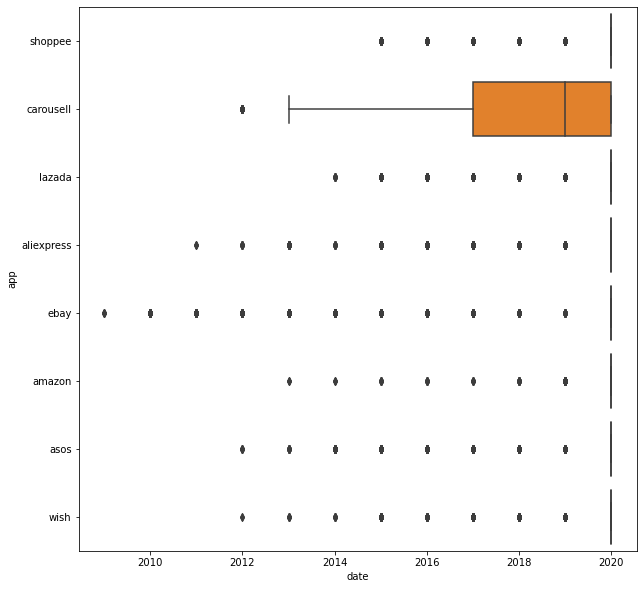

In [19]:
plt.figure(figsize = (10,10))
sns.boxplot(x = df['date'].dt.year, y = 'app', data = df);

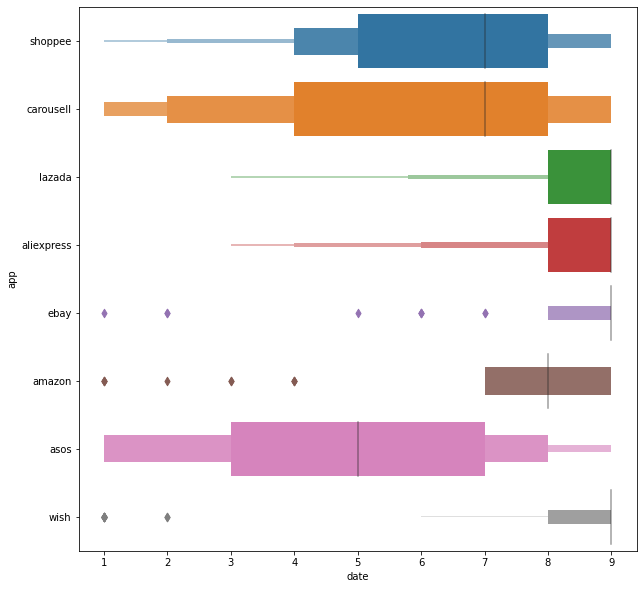

In [20]:
plt.figure(figsize = (10,10))
sns.boxenplot(x = df['date'].dt.month, y = 'app', data = df[df['date'].dt.year == 2020]);

# Using only 2020 data

In [21]:
df = df[df['date'].dt.year == 2020]

In [22]:
#check app number of review
df['app'].value_counts()

shoppee       11601
aliexpress    10697
lazada        10292
wish          10053
amazon        10031
ebay          10011
asos           9653
carousell      6596
Name: app, dtype: int64

In [23]:
df.columns

Index(['rating', 'date', 'app', 'store', 'review'], dtype='object')

In [24]:
df['rating'].value_counts(normalize=True)

5    0.699825
1    0.135506
4    0.099818
3    0.036474
2    0.028378
Name: rating, dtype: float64

In [25]:
df['review'][:5]

0      Orders mostly came early and products are good.
1                                  Good and convenient
2                                        Gd...........
3    My first purchase experience...Happy with purc...
4                  A lot of items at a very good deal.
Name: review, dtype: object

# Cleaning of Text data for Modeling

In [26]:
text1 = df['review'][20].lower()
text1

'the best online shop. 😁'

In [27]:
sp = spacy.load('en_core_web_sm')
emoji = Emoji(sp, merge_spans = False)
sp.add_pipe(emoji, first = True)

In [28]:
sen = sp(text1)
for token in sen:
    print(token.text)

the
best
online
shop
.
😁


In [29]:
for word in sen:
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

the          DET        DT       determiner
best         ADJ        JJS      adjective, superlative
online       ADJ        JJ       adjective
shop         NOUN       NN       noun, singular or mass
.            PUNCT      .        punctuation mark, sentence closer
😁            X          ADD      email


In [30]:
adj_list = ''
noun_list = ''
verb_list = ''
emoji_list = ''

for word in sen:
    if word._.is_emoji:
        emoji_list += str(word)
    else:
        if word.pos_ == 'ADJ':
            adj_list += str(word) + ' '
        
        elif word.pos_ == 'NOUN':
            noun_list += str(word) + ' '
        
        elif word.pos_ == 'VERB':
            verb_list += str(word) + ' '
        

In [31]:
print(adj_list)
print(noun_list)
print(verb_list)
print(emoji_list)

best online 
shop 

😁


# removing emojis and punctuations

In [32]:
string = []
for word in sen:
    if word.is_stop == False:
        if word._.is_emoji == False:
            if word.pos_ != 'PUNCT':
                if word.pos_ != 'NUM':
                    string.append(str(word.lemma_).lower())
string

['good', 'online', 'shop']

# removing non english words

In [33]:
test_words = set(words.words())
en_words = [w for w in string if w.lower() in test_words or not w.isalpha()]
en_words

['good', 'shop']

# Lemmatize words

In [34]:
lemma = WordNetLemmatizer()
words_lemma = [lemma.lemmatize(i) for i in en_words]
words_lemma

['good', 'shop']

# get Sentiments scores

In [35]:
analyser = SentimentIntensityAnalyzer()
print(df['review'][1])
analyser.polarity_scores(df['review'][1])

Good and convenient


{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [36]:
sp = spacy.load('en')
emoji = Emoji(sp, merge_spans = False)
sp.add_pipe(emoji, first = True)
analyser = SentimentIntensityAnalyzer()
tokenizer = RegexpTokenizer(r'\w+')
test_words = set(words.words())
lemma = WordNetLemmatizer()

def words_cleaning(text):
    
    #get score from raw text
    scores = analyser.polarity_scores(str(text))
    
    # use spacy to categorize words
    sen = sp(str(text))
    
    #creating list to store words
    adj_list = ''
    noun_list = ''
    verb_list = ''
    emoji_list = ''
    
    for word in sen:
        if word._.is_emoji:
            emoji_list += str(word)
        else:
            if word.pos_ == 'ADJ':
                adj_list += (str(word.lemma_).lower()) + ' ' 
        
            elif word.pos_ == 'NOUN':
                noun_list += (str(word.lemma_).lower()) + ' '
        
            elif word.pos_ == 'VERB':
                verb_list += (str(word.lemma_).lower()) + ' '
                
    string = []
    for word in sen:
        if word.is_stop == False:
            if word._.is_emoji == False:
                if word.pos_ != 'PUNCT':
                    string.append(str(word).lower())       
    
    #removing non english words
    en_words = [w for w in string if w.lower() in test_words or not w.isalpha()]

    #steming tokens
    words_lemma = [lemma.lemmatize(i) for i in en_words]
    
    #join words
    join_words = (" ".join(words_lemma))
  
    return(join_words, adj_list, noun_list, verb_list, emoji_list, scores)

In [37]:
words_cleaning(df['review'][300])

('worst faced issue reading',
 'bad same ',
 'app issue review ',
 'face regret read ',
 '',
 {'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'compound': -0.7717})

In [38]:
words_cleaning(df['review'][300])[5]['neg']

0.309

# Function to clean text Data

In [39]:
total_text = len(df['review'])
print(f'There is a total of {total_text} selftext.')

#instantiate empty list to hold cleaned data
clean_text = []
adj_text = []
noun_text = []
verb_list = []
emoji_icons = []
neg_scores = []
neu_scores = []
pos_scores = []
compound_scores = []

t0 = time()
print("Cleaning and parsing the training set text...")

# Instantiate counter.
j = 0

# For every review in our training set...
for text in df['review']:
    
    join, adj, noun, verb, emoji, scores = words_cleaning(text)
    
    # Convert text to words, then append to clean_train_text.
    clean_text.append(str(join).lower())
    adj_text.append(adj)
    noun_text.append(noun)
    verb_list.append(verb)
    emoji_icons.append(emoji)
    neg_scores.append(scores['neg'])
    neu_scores.append(scores['neu'])
    pos_scores.append(scores['pos'])
    compound_scores.append(scores['compound'])
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 10000 == 0:
        print(f'selftext {j + 1} of {total_text}.')
        bag_test_time = time() - t0
        print('Fit time:  %0.3fs' % bag_test_time);
    j += 1

    
print(f'selftext {total_text} of {total_text}.')    
print('Cleaning complete')

df['clean_content'] = clean_text
df['adj'] = adj_text
df['noun'] = noun_text
df['verb'] = verb_list
df['emoji'] = emoji_icons
df['neg_score'] = neg_scores
df['neu_score'] = neu_scores
df['pos_score'] = pos_scores
df['compound_score'] = compound_scores

There is a total of 78934 selftext.
Cleaning and parsing the training set text...
selftext 10000 of 78934.
Fit time:  70.907s
selftext 20000 of 78934.
Fit time:  141.760s
selftext 30000 of 78934.
Fit time:  209.978s
selftext 40000 of 78934.
Fit time:  279.042s
selftext 50000 of 78934.
Fit time:  351.772s
selftext 60000 of 78934.
Fit time:  426.261s
selftext 70000 of 78934.
Fit time:  496.950s
selftext 78934 of 78934.
Cleaning complete


In [42]:
df.head()

,rating,date,app,store,review,clean_content,adj,noun,verb,emoji,neg_score,neu_score,pos_score,compound_score
0,5,2020-09-16 20:26:28,shoppee,google,Orders mostly came early and products are good.,came early good,good,order product,come,,0.0,0.707,0.293,0.4404
1,4,2020-09-16 20:13:46,shoppee,google,Good and convenient,good convenient,good convenient,,,,0.0,0.408,0.592,0.4404
2,5,2020-09-16 20:13:05,shoppee,google,Gd...........,,,,,,0.0,1.000,0.000,0.0000
3,4,2020-09-16 20:11:18,shoppee,google,My first purchase experience...Happy with purc...,purchase experience happy,first happy,purchase experience purchase,,,0.0,0.714,0.286,0.3400
4,5,2020-09-16 20:08:54,shoppee,google,A lot of items at a very good deal.,lot good deal,good,lot item deal,,,0.0,0.715,0.285,0.4927


In [43]:
df.to_csv('../data/cleaned_reviews.csv', index=None, header=True)